You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:

Note: I have tried all the possible methods for the practise purpose.

# **Q1. Perform basic EDA**

In [56]:
#Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew,zscore,kurtosis

In [7]:
#loading the dataset
df=pd.read_csv('house_price.csv')

In [8]:
#checking the first few rows
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [9]:
#getting the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [10]:
#getting the summary of each column
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [11]:
#checking for missing values
df.isnull().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0
bhk,0
price_per_sqft,0


In [12]:
#Find unique values
df.nunique()

,0
location,241
size,31
total_sqft,1972
bath,19
price,1952
bhk,19
price_per_sqft,4951


In [13]:
# dataset shape
df.shape

(13200, 7)

In [14]:
# to view a particular column only
df['price_per_sqft']

,price_per_sqft
0,3699
1,4615
2,4305
3,6245
4,4250
...,...
13195,6689
13196,11111
13197,5258
13198,10407


# **Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median**

*a) Mean and Standard deviation*

*b)Percentile method*

*c) IQR(Inter quartile range method)*

*d) Z Score method*

# a) Mean and Standard deviation

In [15]:
#detecting the outliers

mean = df['price_per_sqft'].mean()
std_dev = df['price_per_sqft'].std()
upper_limit=mean + 3 * (std_dev)
lower_limit=mean - 3 * (std_dev)
outliers=df[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]
print("Number of outliers :",len(outliers))

Number of outliers : 5


In [16]:
#removal using trimming(not ideal for small datasets)
df_mean_std_trimmed= df[(df['price_per_sqft']<=upper_limit)&(df['price_per_sqft']>=lower_limit)]
print("Size of column before trimming",df['price_per_sqft'].shape)
print("Size of column after trimming",df_mean_std_trimmed['price_per_sqft'].shape)

Size of column before trimming (13200,)
Size of column after trimming (13195,)


In [17]:
#removal using capping (Size doesn't change)
df_mean_std_capped=df.copy()
df_mean_std_capped["price_per_sqft"] = df_mean_std_capped["price_per_sqft"].clip(lower=lower_limit, upper=upper_limit)
print("Size of column before capping",df['price_per_sqft'].shape)
print("Size of column after capping",df_mean_std_capped['price_per_sqft'].shape)

Size of column before capping (13200,)
Size of column after capping (13200,)


In [18]:
#removal using imputation
#check whether to use mean or median
#checking skewness
Skewness=df['price_per_sqft'].skew()
print("Skewness=",Skewness)
print("Use mean ") if -0.5 < Skewness <0.5 else print("Use median")

Skewness= 108.28105529705168
Use median


In [19]:
#removal using imputation (Size doesn't change)
median= df['price_per_sqft'].median()
print('Median=',median,"\n Filling the outliers using median")
df_mean_std_imputation=df.copy()
df_mean_std_imputation.loc[(df_mean_std_imputation['price_per_sqft']<lower_limit) | (df_mean_std_imputation['price_per_sqft']>upper_limit)]=median
print("Size of column before imputation",df['price_per_sqft'].shape)
print("Size of column after imputation",df_mean_std_imputation['price_per_sqft'].shape)

Median= 5438.0 
 Filling the outliers using median
Size of column before imputation (13200,)
Size of column after imputation (13200,)


#b)Percentile method

In [20]:
upper_limit=np.percentile(df['price_per_sqft'],95)
lower_limit=np.percentile(df['price_per_sqft'],5)
outliers=df[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]
print("Number of outliers :",len(outliers))

Number of outliers : 1320


In [21]:
#removal using trimming(not ideal for small datasets)
df_percentile_trimmed= df[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print("Size of column before trimming",df['price_per_sqft'].shape)
print("Size of column after trimming",df_mean_std_trimmed['price_per_sqft'].shape)

Size of column before trimming (13200,)
Size of column after trimming (13195,)


In [22]:
#removal using capping (Size doesn't change)
df_percentile_capped=df.copy()
df_mean_std_imputation.loc[(df_mean_std_imputation['price_per_sqft']<lower_limit) | (df_mean_std_imputation['price_per_sqft']>upper_limit)]=median
print("Size of column before capping",df['price_per_sqft'].shape)
print("Size of column after capping",df_percentile_capped['price_per_sqft'].shape)

Size of column before capping (13200,)
Size of column after capping (13200,)


In [23]:
#removal using imputation
#skewness already checked and using median to impute
 #removal using imputation (Size doesn't change)
median= df['price_per_sqft'].median()
print('Median=',median,"\n Filling the outliers using median")
df_percentile_imputation=df.copy()
df_percentile_imputation.loc[(df_percentile_imputation['price_per_sqft']>upper_limit) | (df_percentile_imputation['price_per_sqft']<lower_limit) ]=median
print("Size of column before imputation",df['price_per_sqft'].shape)
print("Size of column after imputation",df_percentile_imputation['price_per_sqft'].shape)

Median= 5438.0 
 Filling the outliers using median
Size of column before imputation (13200,)
Size of column after imputation (13200,)


# c) IQR(Inter quartile range method)

In [24]:
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
iqr= q3-q1
lower_limit = q1-(1.5*iqr)
upper_limit = q3+(1.5*iqr)
outliers=df[(df['price_per_sqft']>upper_limit)|(df['price_per_sqft']<lower_limit)]
print("Number of outliers :",len(outliers))

Number of outliers : 1265


In [25]:
#removal using trimming(not ideal for small datasets)
df_iqr_trimmed= df[(df['price_per_sqft']<upper_limit)&(df['price_per_sqft']>lower_limit)]
print("Size of column before trimming",df['price_per_sqft'].shape)
print("Size of column after trimming",df_iqr_trimmed['price_per_sqft'].shape)

Size of column before trimming (13200,)
Size of column after trimming (11935,)


In [26]:
#removal using capping (Size doesn't change)
df_iqr_capped=df.copy()
df_iqr_capped["price_per_sqft"] = df_mean_std_capped["price_per_sqft"].clip(lower=lower_limit, upper=upper_limit)
print("Size of column before capping",df['price_per_sqft'].shape)
print("Size of column after capping",df_iqr_capped['price_per_sqft'].shape)

Size of column before capping (13200,)
Size of column after capping (13200,)


In [27]:
#removal using imputation
#skewness already checked and using median to impute
 #removal using imputation (Size doesn't change)
median= df['price_per_sqft'].median()
print('Median=',median,"\n Filling the outliers using median")
df_iqr_imputation=df.copy()
df_iqr_imputation.loc[(df_iqr_imputation['price_per_sqft']>upper_limit) | (df_iqr_imputation['price_per_sqft']<lower_limit) ]=median
print("Size of column before imputation",df['price_per_sqft'].shape)
print("Size of column after imputation",df_iqr_imputation['price_per_sqft'].shape)

Median= 5438.0 
 Filling the outliers using median
Size of column before imputation (13200,)
Size of column after imputation (13200,)


# d) Z Score method

In [28]:
df['z_score']= zscore(df['price_per_sqft'])
outliers = df[(df["z_score"] < -3) | (df["z_score"] > 3)]
print("Number of Outliers:", len(outliers))

Number of Outliers: 5


In [29]:
#removal using trimming(not ideal for small datasets)
df_zscore_trimmed= df[(df["z_score"] >= -3) & (df["z_score"] <= 3)]
print("Size of column before trimming",df['price_per_sqft'].shape)
print("Size of column after trimming",df_zscore_trimmed['price_per_sqft'].shape)

Size of column before trimming (13200,)
Size of column after trimming (13195,)


In [30]:
#removal using capping (Size doesn't change)

upper_limit=mean + 3 * (std_dev)
lower_limit=mean - 3 * (std_dev)
df_zscore_capped=df.copy()
df_zscore_capped["price_per_sqft"] = df["price_per_sqft"].clip(lower=lower_limit, upper=upper_limit)
print("Size of column before capping",df['price_per_sqft'].shape)
print("Size of column after capping",df_zscore_capped['price_per_sqft'].shape)

Size of column before capping (13200,)
Size of column after capping (13200,)


In [31]:
#removal using imputation
#skewness already checked and using median to impute
 #removal using imputation (Size doesn't change)
median= df['price_per_sqft'].median()
print('Median=',median,"\n Filling the outliers using median")
df_zscore_imputation=df.copy()
df_zscore_imputation.loc[(df["z_score"] < -3) | (df["z_score"] > 3), "price_per_sqft"] =median
print("Size of column before imputation",df['price_per_sqft'].shape)
print("Size of column after imputation",df_iqr_imputation['price_per_sqft'].shape)

Median= 5438.0 
 Filling the outliers using median
Size of column before imputation (13200,)
Size of column after imputation (13200,)


# **Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?**

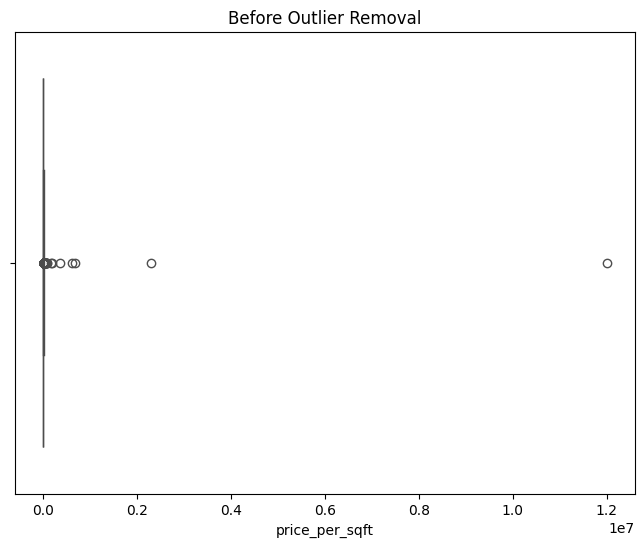

In [36]:
# Load the dataset
df = pd.read_csv("house_price.csv")  # Ensure your file path is correct

# Boxplot before any outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["price_per_sqft"], color="red").set_title("Before Outlier Removal")
plt.show()

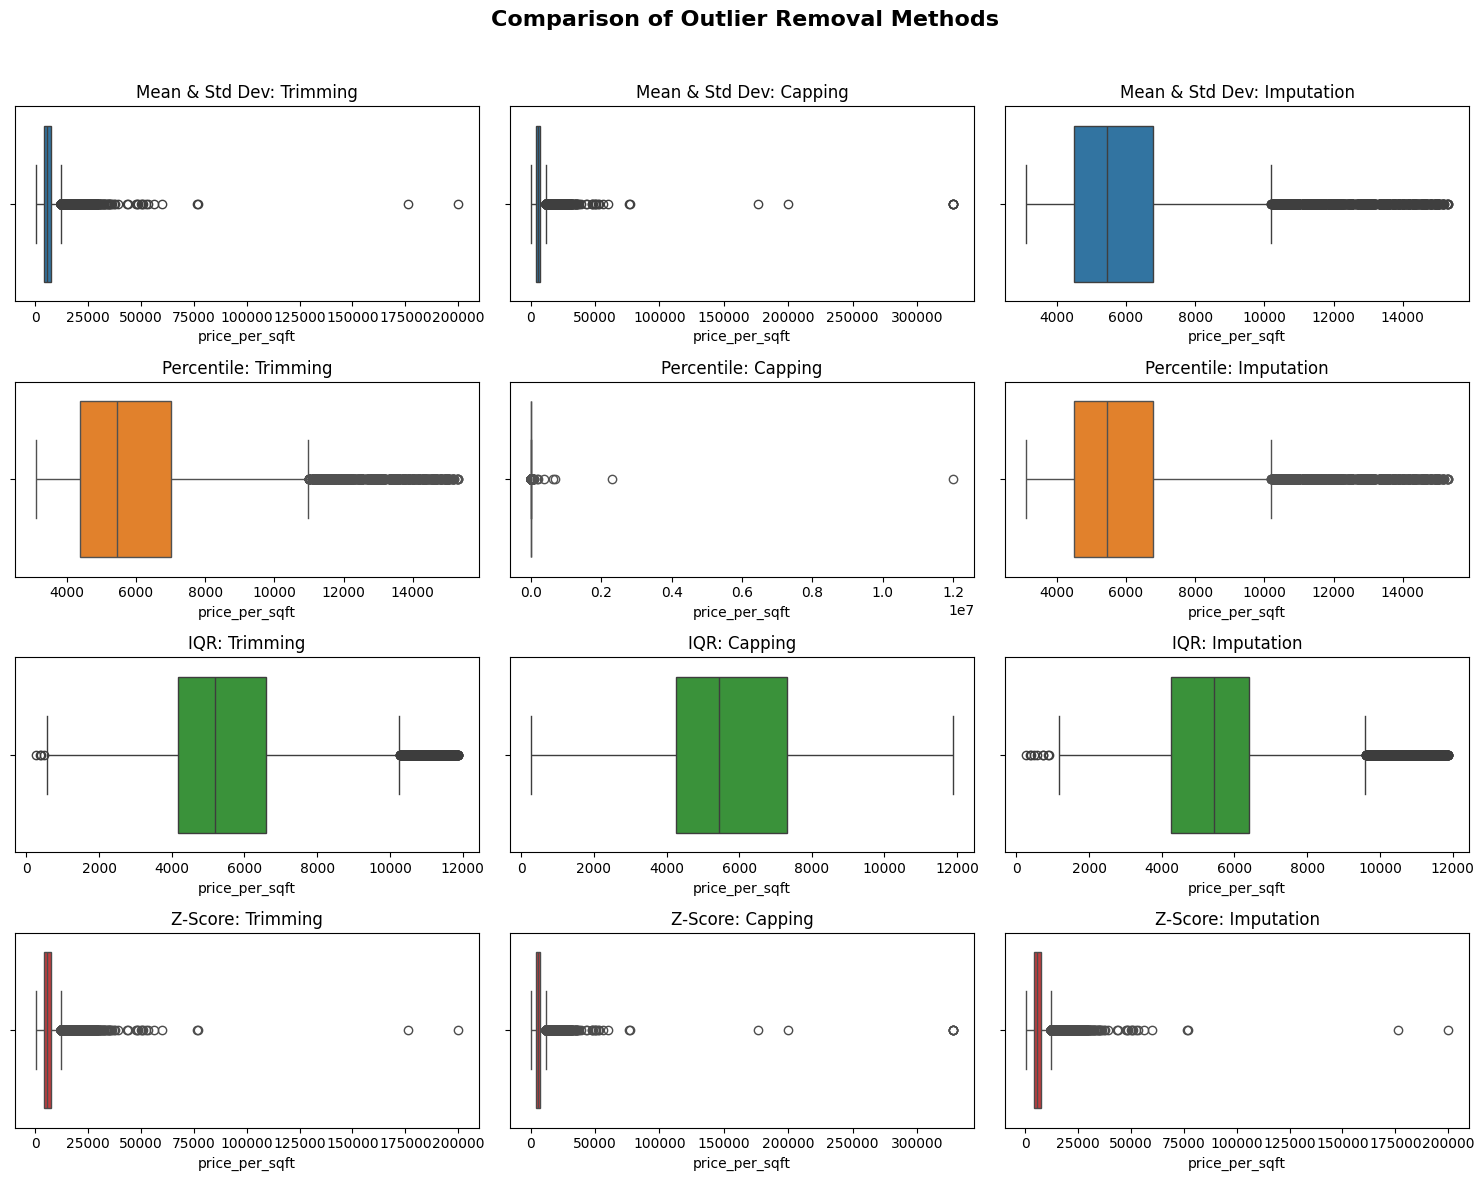

In [35]:

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Blue, Orange, Green, Red

fig, axes = plt.subplots(4, 3, figsize=(15, 12))


methods = ["Mean & Std Dev", "Percentile", "IQR", "Z-Score"]
datasets = [
    (df_mean_std_trimmed, df_mean_std_capped, df_mean_std_imputation),
    (df_percentile_trimmed, df_percentile_capped, df_percentile_imputation),
    (df_iqr_trimmed, df_iqr_capped, df_iqr_imputation),
    (df_zscore_trimmed, df_zscore_capped, df_zscore_imputation)
]
titles = ["Trimming", "Capping", "Imputation"]

# Loop through each method and its datasets
for i, (method, data) in enumerate(zip(methods, datasets)):
    for j, (df, title) in enumerate(zip(data, titles)):
        sns.boxplot(x=df["price_per_sqft"], ax=axes[i, j], color=colors[i])
        axes[i, j].set_title(f"{method}: {title}")


fig.suptitle("Comparison of Outlier Removal Methods", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


IQR Trimming appears to work best in reducing outliers without losing too much data.

Percentile Capping is effective but can lead to over-correction.

Mean & Standard Deviation Capping retains more data but might not fully eliminate extreme outliers.

Z-Score Methods may not be the best fit for this dataset, as extreme values still persist.



# **Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. Check the skewness and kurtosis before and after the transformation.**

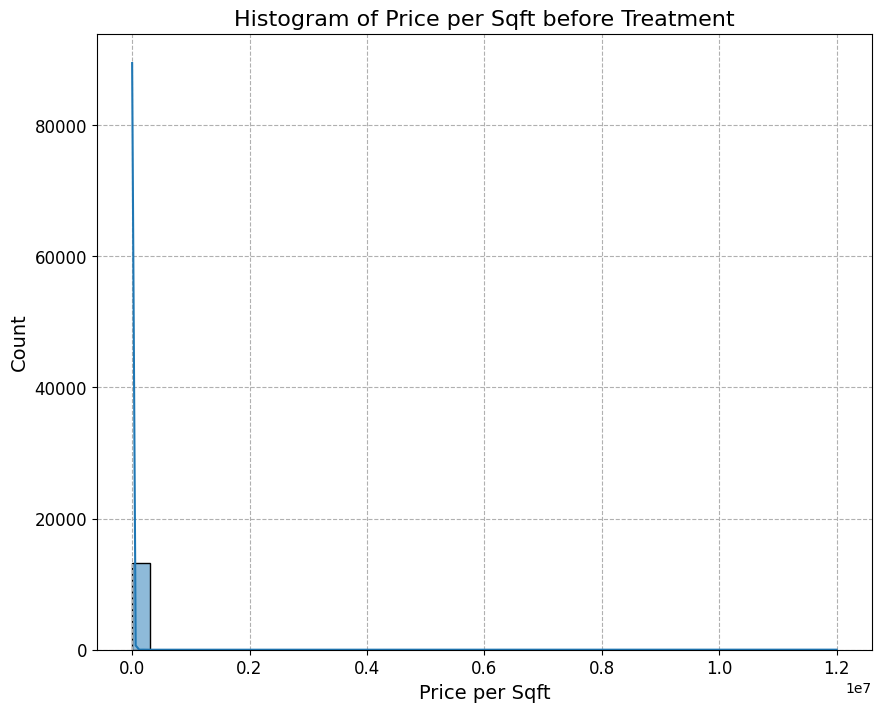

In [79]:
plt.figure(figsize=(10, 8))
sns.histplot(df['price_per_sqft'], kde=True, bins=40)
plt.title("Histogram of Price per Sqft before Treatment", fontsize=16)
plt.xlabel("Price per Sqft", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--")
plt.show()

In [59]:
#checking the skewness and kurtosis before treatment

Skewness_bfr=skew(df['price_per_sqft'])
print("Skewness before treatment=",Skewness_bfr)
Kurtosis_bfr=kurtosis(df['price_per_sqft'])
print("Kurtosis before treatment=",Kurtosis_bfr)

Skewness before treatment= 108.26875024325159
Kurtosis before treatment= 12090.633538860382


In [61]:
# Apply Transformations
df['price_per_sqft_log'] = np.log1p(df['price_per_sqft'])
df['price_per_sqft_sqrt'] = np.sqrt(df['price_per_sqft'])
df['price_per_sqft_cbrt'] = np.cbrt(df['price_per_sqft'])

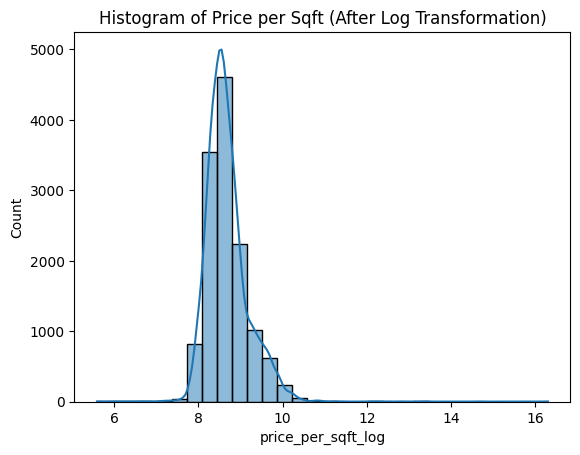

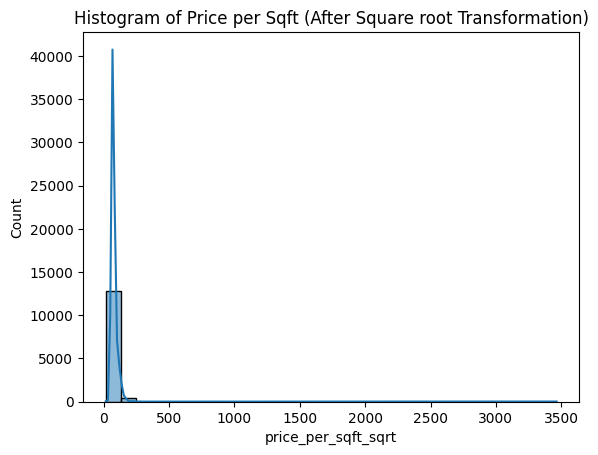

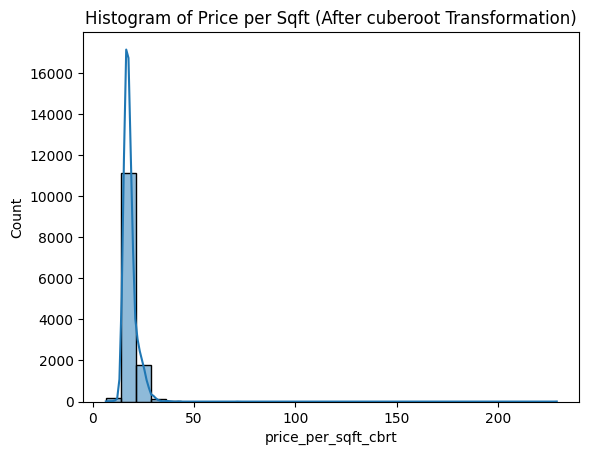

In [65]:
#histogram after transformations
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30)
plt.title("Histogram of Price per Sqft (After Log Transformation)")
plt.show()
sns.histplot(df['price_per_sqft_sqrt'], kde=True, bins=30)
plt.title("Histogram of Price per Sqft (After Square root Transformation)")
plt.show()
sns.histplot(df['price_per_sqft_cbrt'], kde=True, bins=30)
plt.title("Histogram of Price per Sqft (After cuberoot Transformation)")
plt.show()

Log transformation works best.

In [66]:
#checking the skewness and kurtosis after treatment

Skewness_aft=skew(df['price_per_sqft_log'])
print("Skewness before treatment=",Skewness_aft)
Kurtosis_aft=kurtosis(df['price_per_sqft_log'])
print("Kurtosis before treatment=",Kurtosis_aft)

Skewness before treatment= 1.4003259019533636
Kurtosis before treatment= 9.203000543610957


# **Q5. Check the correlation between all the numerical columns and plot heatmap.**

In [73]:
#filtering the numerical columns
num_cols= df.select_dtypes(include=['float64', 'int64']).columns
# Computingthe correlation matrix
corr_matrix = df[num_cols].corr()

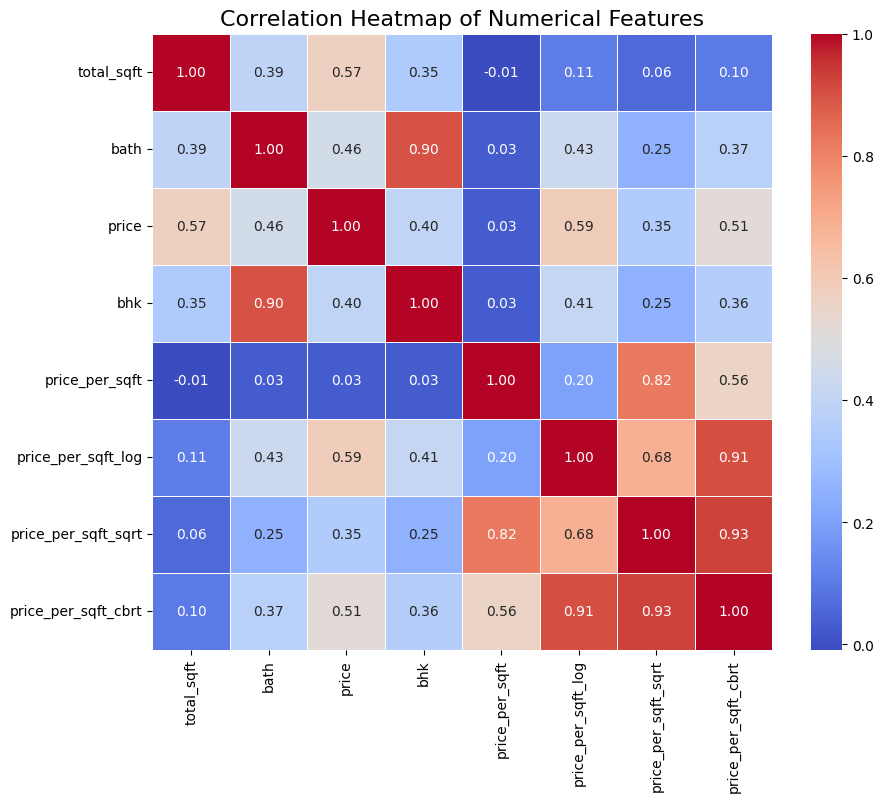

In [80]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


# **Q6. Draw Scatter plot between the variables to check the correlation between them.**


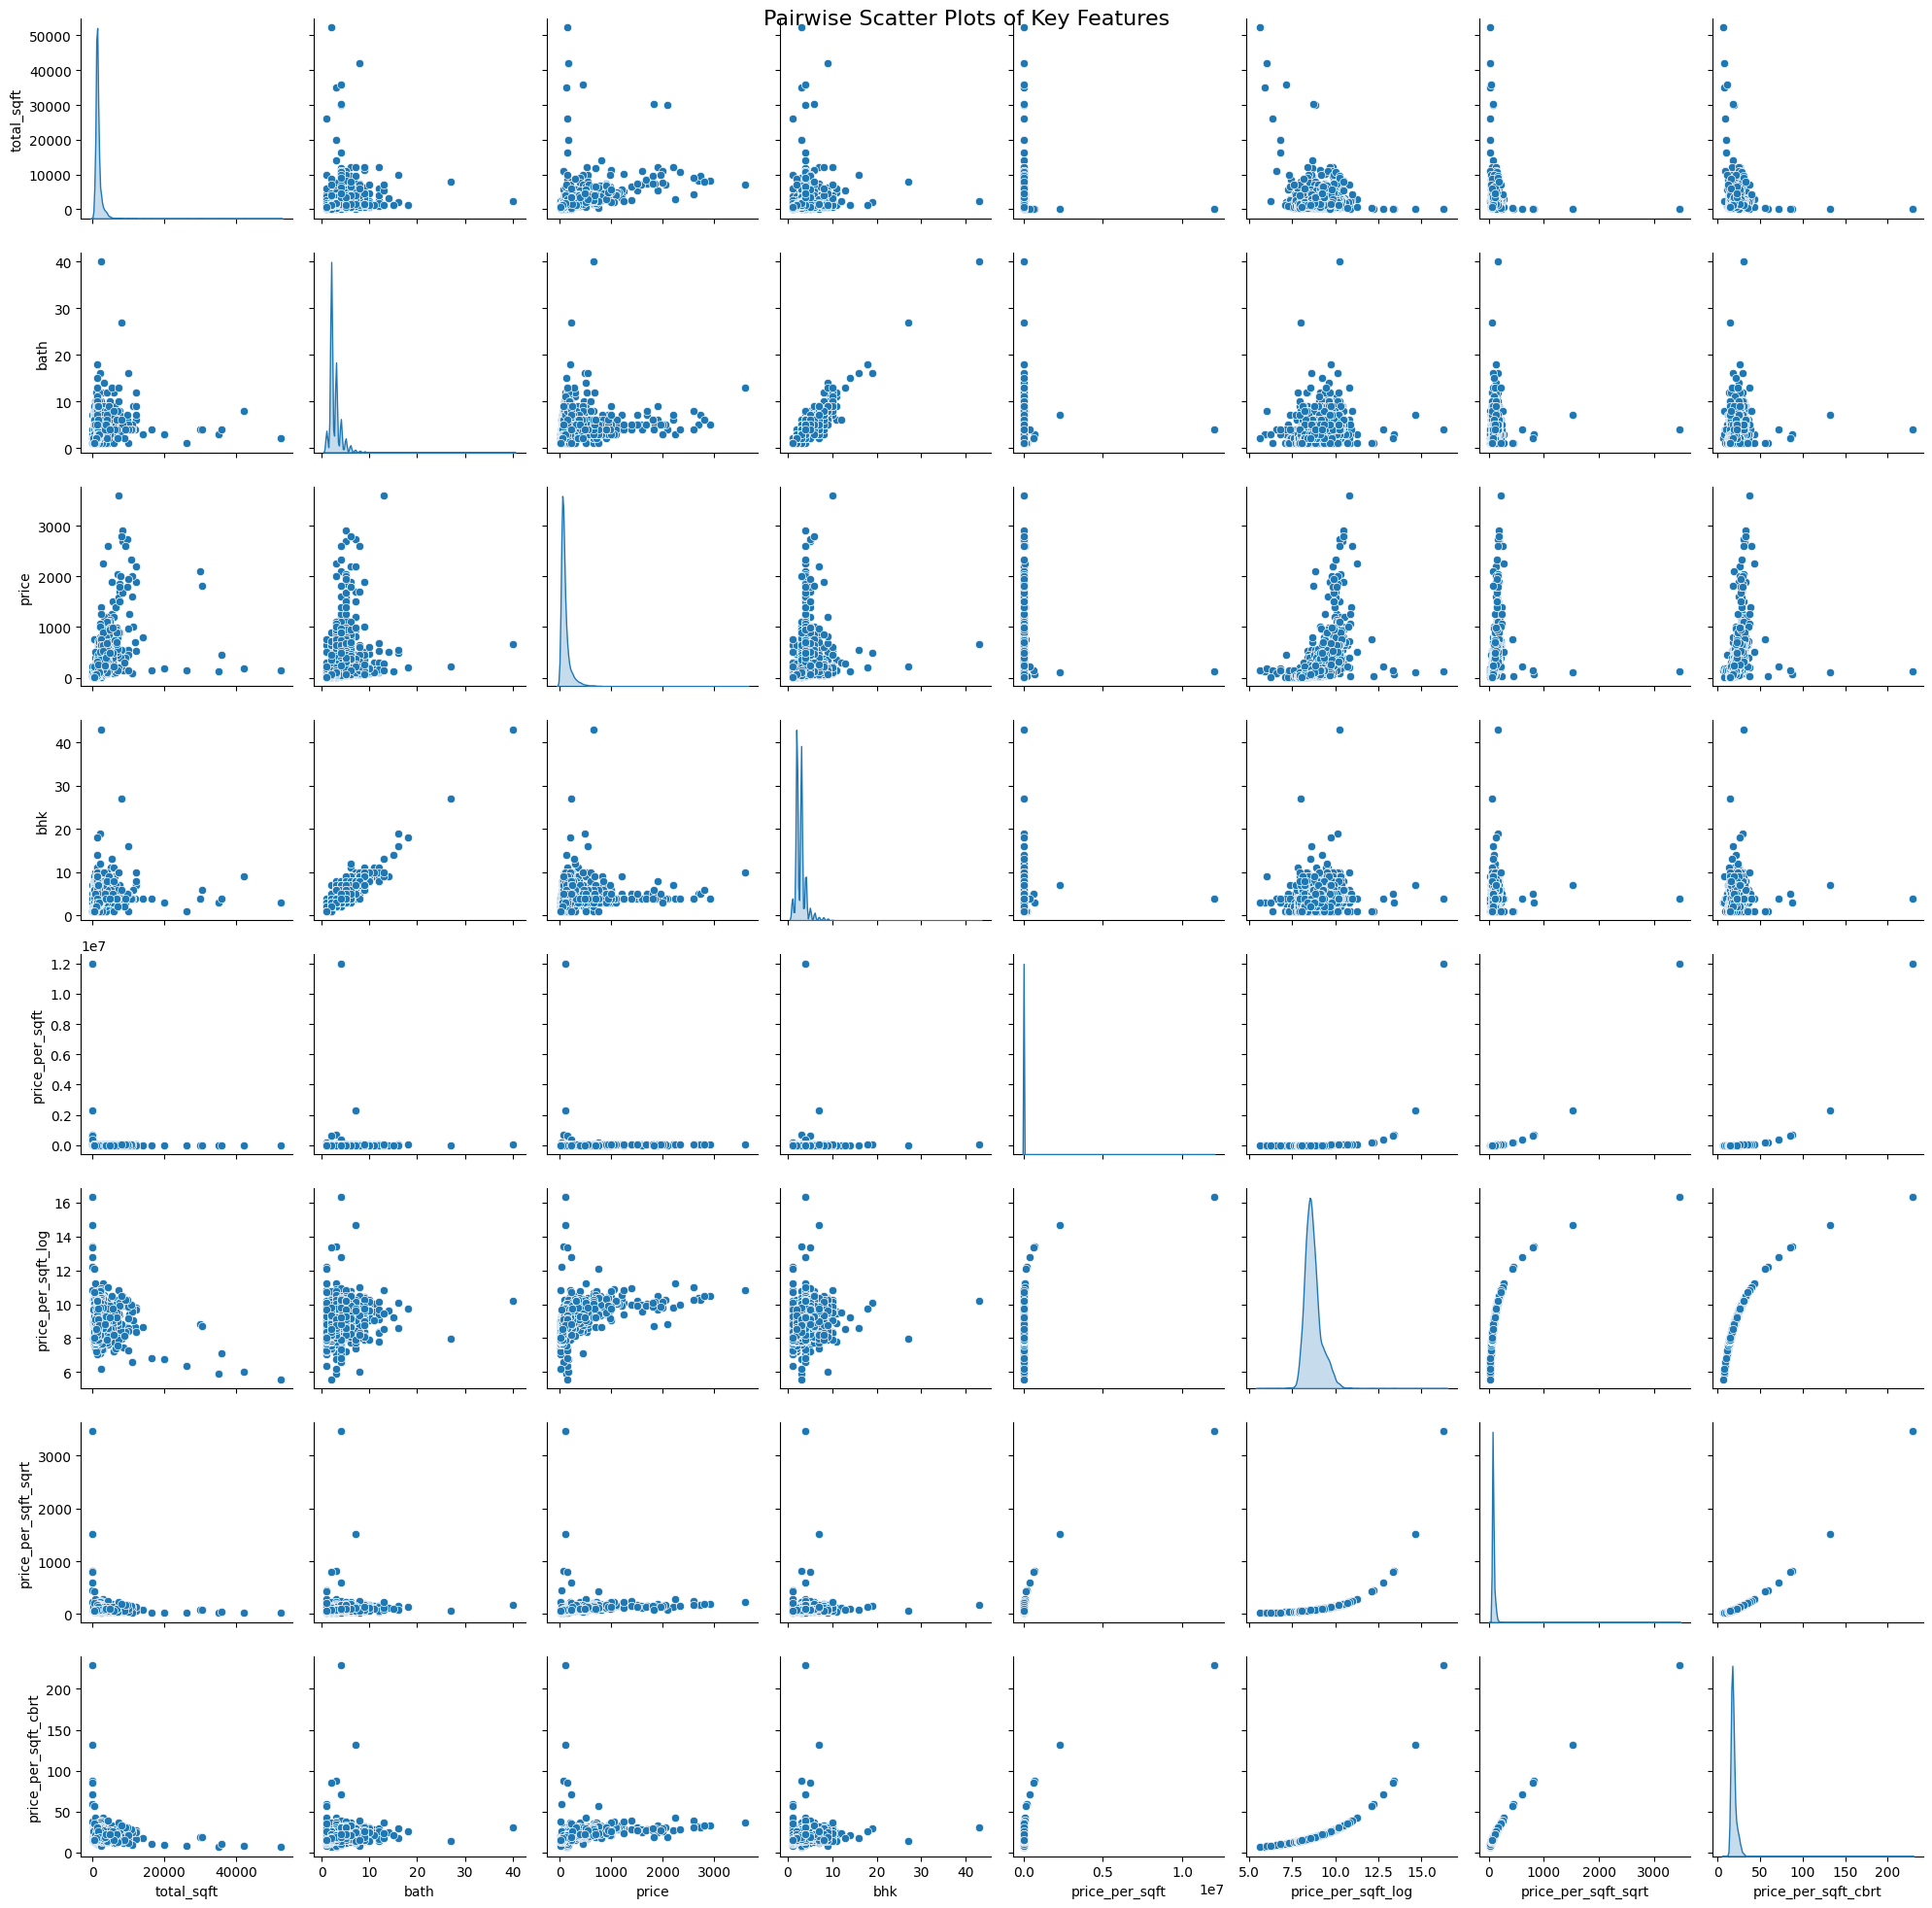

In [78]:
sns.pairplot(df[num_cols], diag_kind='kde')
plt.suptitle("Pairwise Scatter Plots of Key Features", fontsize=16)
plt.tight_layout()
plt.show()